<a href="https://colab.research.google.com/github/figwild/CWS-Class/blob/main/Regal_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libraries
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *
import base64
import pandas as pd
import os
import PIL
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
#from pathlib import Path
from numpy import *
import torch
print(torch.cuda.is_available())

True


In [3]:
path = Path("/content/drive/MyDrive/Regals")
dir_list = [x for x in path.iterdir() if x.is_dir()]
print(dir_list)
path.ls()

[Path('/content/drive/MyDrive/Regals/No Regals'), Path('/content/drive/MyDrive/Regals/Yes Regals')]


(#2) [Path('/content/drive/MyDrive/Regals/No Regals'),Path('/content/drive/MyDrive/Regals/Yes Regals')]

In [4]:
np.random.seed(57)

Regal = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms= Resize(300, 'squish'),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [5]:
#set batch size
dls = Regal.dataloaders(path, bs = 10)

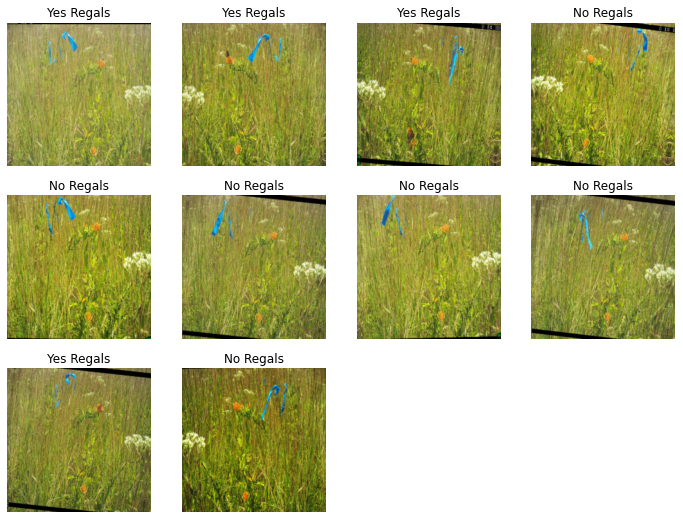

In [6]:
dls.show_batch(max_n = 10)

In [7]:
#Checking the class label names
dls.vocab.o2i

{'No Regals': 0, 'Yes Regals': 1}

In [8]:
#Generate the Learner 
learn = cnn_learner(dls, resnet101, pretrained = True, metrics = accuracy).to_fp16()

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe222

  0%|          | 0.00/171M [00:00<?, ?B/s]

In [9]:
#Initial Training (burn in)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.177040,1.333465,0.550000,00:32
1,1.152488,0.898455,0.650000,00:24
2,1.275478,0.864603,0.600000,00:23


In [10]:
#Initial Training (burn in)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.756981,0.640417,0.700000,00:24
1,0.926636,0.708385,0.750000,00:24
2,0.930021,0.759563,0.700000,00:24


In [11]:
#Initial Training (burn in)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.851224,0.590279,0.800000,00:25
1,0.848651,0.640480,0.750000,00:24
2,0.735792,0.782488,0.750000,00:24


In [12]:
#learn.unfreeze()
learn.unfreeze()

In [13]:
# Trained on all layers
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.451590,105.209373,0.550000,00:25
1,2.228911,18.530079,0.450000,00:23
2,1.787804,2.439293,0.600000,00:25


In [14]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.860583,5.060314,0.550000,00:24
1,0.869797,3.048654,0.650000,00:25
2,0.619430,0.025391,1.000000,00:26


In [15]:
#With Transforms
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.402177,0.206010,0.900000,00:23
1,0.568969,0.317775,0.900000,00:25
2,0.534695,0.723989,0.750000,00:25


In [16]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.596618,0.274243,0.900000,00:26
1,0.508046,0.089255,0.950000,00:24
2,0.374112,0.044221,0.950000,00:26


In [17]:
learn.fit_one_cycle(8, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.186824,0.005953,1.000000,00:27
1,0.258109,0.004560,1.000000,00:28
2,0.286071,0.006240,1.000000,00:26
3,0.253400,0.008003,1.000000,00:25
4,0.231334,0.005994,1.000000,00:25
5,0.209457,0.005551,1.000000,00:26
6,0.226842,0.006595,1.000000,00:25
7,0.217514,0.005680,1.000000,00:25


In [21]:
#learn.save('example_cws_1')
#learn.load('example_cws_1')
learn.save('Regal_Project_1')
learn.load('Regal_Project_1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

SuggestedLRs(valley=0.00013182566908653826)

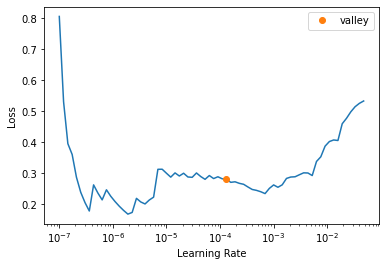

In [23]:
learn.lr_find()

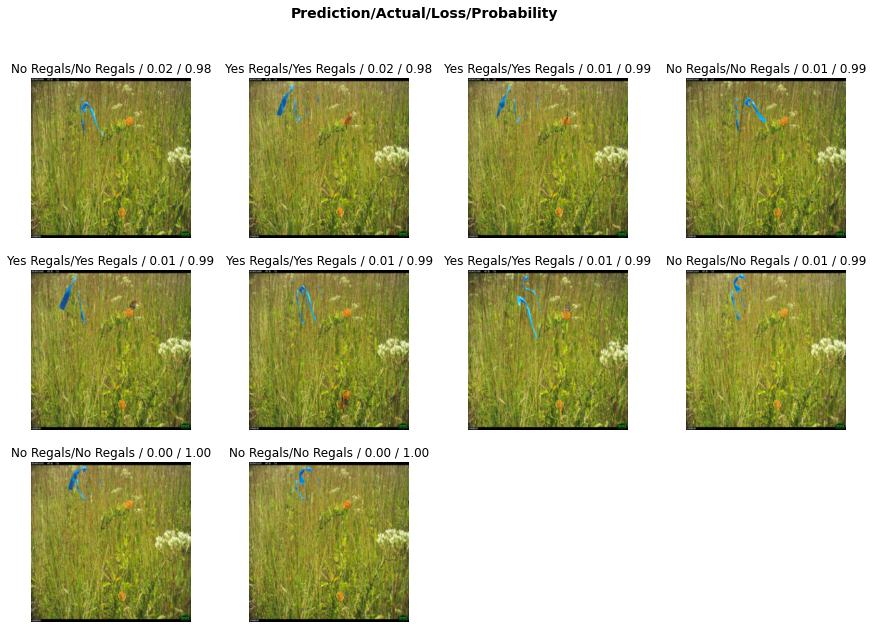

In [24]:
interp.plot_top_losses(10, figsize=(15,10), largest=True)

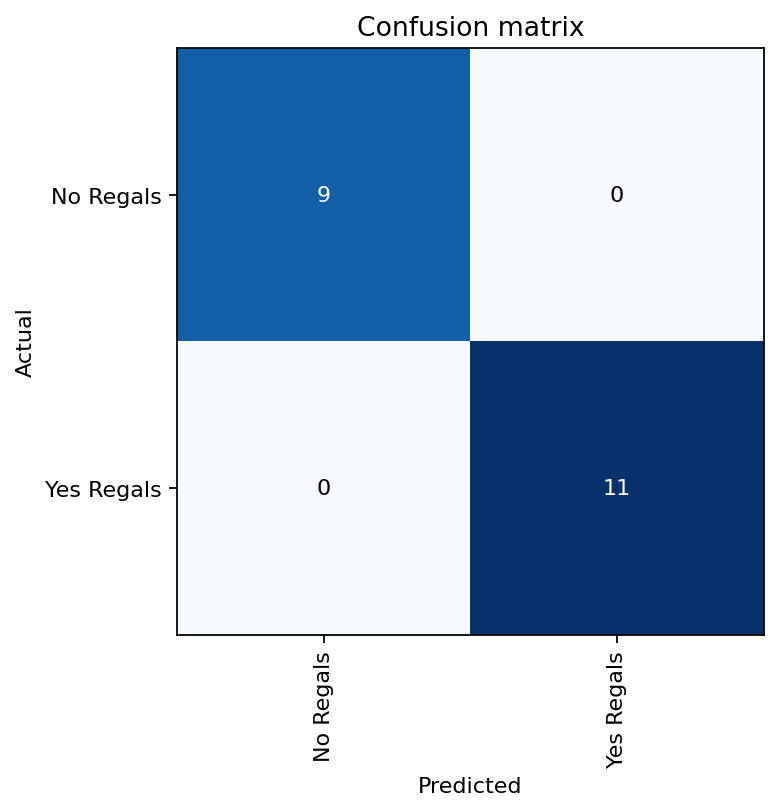

In [25]:
interp.plot_confusion_matrix(figsize=(5,5), dpi=160)

In [26]:
interp.most_confused(min_val=3)

[]

In [27]:
learn.export('Regal_Project_1.pkl')